In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset/diabetes.csv");


In [4]:
print("top 5 data of data frame\n", df.head())

print("bottom 5 data of data frame\n", df.tail())

print("Shape of the dataset:", df.shape)

print("Data info: ", df.info())

print("Columns in the dataset:", df.columns)

print("Statistical Summary:")
print(df.describe())

print(f"Null values in the dataframe are:\n{df.isnull().sum()}")


top 5 data of data frame
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
bottom 5 data of data frame
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121 

In [5]:
df_clean = df.dropna;
print("cleand the data frame:\n",df_clean);

cleand the data frame:
 <bound method DataFrame.dropna of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0      

In [6]:
# Checking if there is any duplicate value in the data frame
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


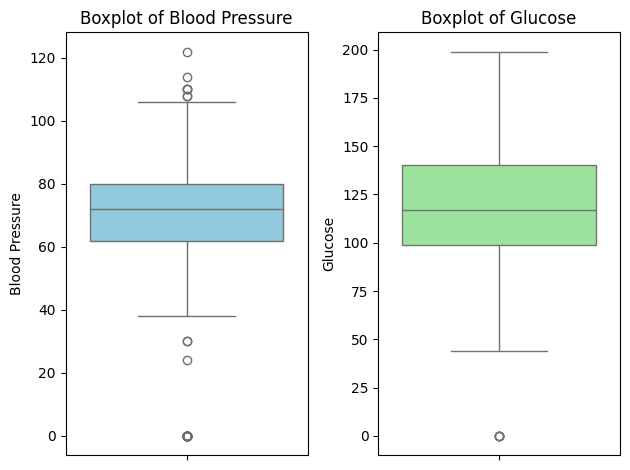

In [ ]:
import seaborn as sns

# Boxplot for Blood Pressure
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
sns.boxplot(data=df, y='BloodPressure', color='skyblue')
plt.title('Boxplot of Blood Pressure')
plt.ylabel('Blood Pressure')

# Boxplot for Glucose
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.boxplot(data=df, y='Glucose', color='lightgreen')
plt.title('Boxplot of Glucose')
plt.ylabel('Glucose')

# Display the plots
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use Linear Regression model from Scikit-learn.

In [8]:
# Feature
X = df.drop(columns=["BloodPressure"])
print("Feature are:\n", X.columns);

# Target
Y= df['BloodPressure'];
print("Target: ", Y);

# Scaling the feature with
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X);


Feature are:
 Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Target:  0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 402.8523890426408
R^2 Score: 0.19403775986668126


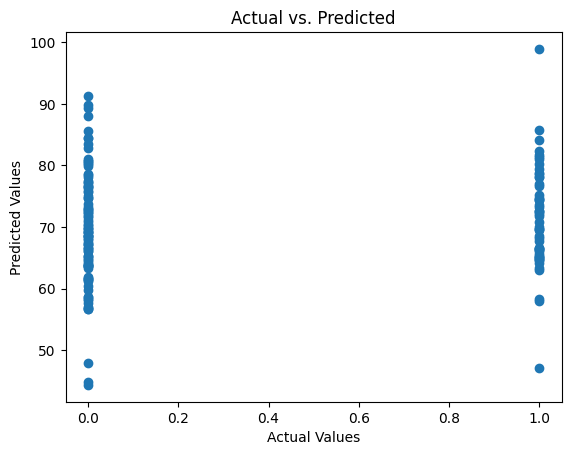

In [16]:
# Actual vs. Predicted For linear Regression
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()

# **Predict whether the patient has diabetes (target column: Outcome).**
# Use Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [12]:
# Features (X) and target (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Training
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicting
y_pred_log = log_reg.predict(X_test)

# Evaluating
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))


Logistic Regression:
Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

[[78 21]
 [18 37]]


# **Visualization for Logistic Regression Confusion Matrix**

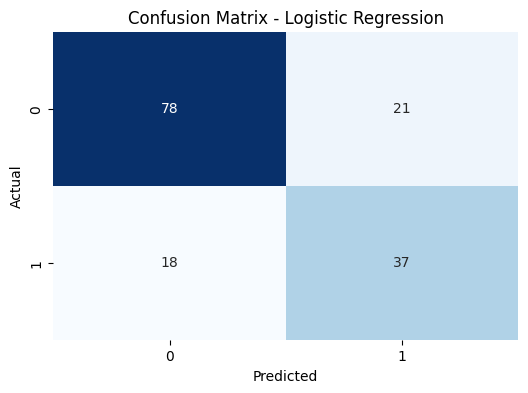

In [20]:
# Logistic Regression Confusion Matrix
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")

# **Predict whether the patient has diabetes (target column: Outcome).**
# Use  K-Nearest Neighbors (KNN) model.

In [14]:
# Training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting
y_pred_knn = knn.predict(X_test)

# Evaluating
print("K-Nearest Neighbors:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors:
Accuracy: 0.6623376623376623
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154

[[70 29]
 [23 32]]


# **Visulation for K-Nearest Neighbors Confusion Matrix**

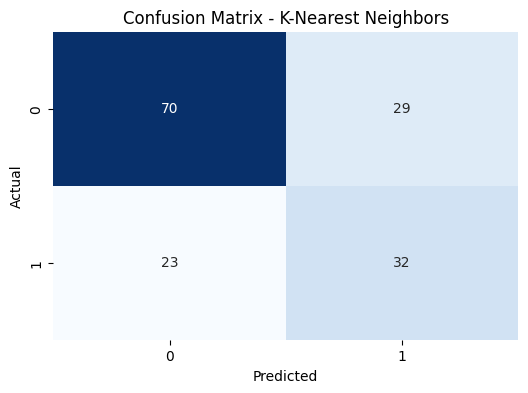

In [21]:
# K-Nearest Neighbors Confusion Matrix
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")